In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.1 MB/s 
     |████████████████████████████████| 7.8 MB 56.0 MB/s 
     |████████████████████████████████| 16.6 MB 59.6 MB/s 


In [ ]:
import matplotlib.font_manager

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point


In [ ]:
fp = "drive/MyDrive/Colab Notebooks/Himachal/hp_sh/Himachal_Pradesh%3A_Education.shp"
map_df = gpd.read_file(fp)
map_df.head()

,objectid,name,state,country,level_,year,pri_ger_pe,pri_ner_pe,pri_dor_pe,pri_ptr_pe,...,upri_ptr_p,upri_scr_p,upri_ge_pe,upri_ft_pe,upri_ngs_2,upri_sgt_p,upri_sbt_p,upri_sdwf_,upri_se_pe,geometry
0,1,Bilaspur,Himachal Pradesh,India,District,2013-14,100.400002,81.900002,NaN,12,...,8,11,50.200001,21.700001,48.799999,96.800003,96.800003,95.900002,96.699997,"POLYGON ((76.70677 31.59541, 76.70746 31.59532..."
1,2,Chamba,Himachal Pradesh,India,District,2013-14,100.599998,84.000000,NaN,15,...,10,13,48.799999,20.799999,46.299999,97.699997,94.900002,100.000000,69.800003,"POLYGON ((76.57934 33.20694, 76.58356 33.20672..."
2,3,Hamirpur,Himachal Pradesh,India,District,2013-14,98.300003,80.599998,NaN,13,...,8,9,48.799999,23.299999,35.000000,100.000000,100.000000,100.000000,100.000000,"POLYGON ((76.59443 31.89290, 76.59453 31.89290..."
3,4,Kangra,Himachal Pradesh,India,District,2013-14,92.699997,76.900002,1.8,12,...,9,13,49.500000,30.799999,38.599998,98.199997,97.900002,100.000000,93.300003,"POLYGON ((76.90636 32.46619, 76.90717 32.46580..."
4,5,Kinnaur,Himachal Pradesh,India,District,2013-14,105.500000,88.900002,6.9,9,...,5,8,55.200001,30.100000,36.099998,94.400002,94.400002,100.000000,66.699997,"POLYGON ((78.67739 32.08727, 78.67776 32.08719..."


In [ ]:
map_df.shape

(12, 31)

In [ ]:
map_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
map_df = map_df.to_crs("EPSG:3395")

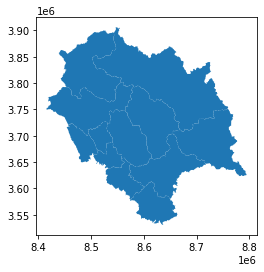

In [ ]:
map_df = map_df[['name', 'geometry']]
map_df.plot()

In [ ]:
map_df.name

0          Bilaspur
1            Chamba
2          Hamirpur
3            Kangra
4           Kinnaur
5             Kullu
6     Lahul & Spiti
7             Mandi
8             Solan
9            Shimla
10          Sirmaur
11              Una
Name: name, dtype: object

In [ ]:
dt = list(map_df.name)
dt

['Bilaspur',
 'Chamba',
 'Hamirpur',
 'Kangra',
 'Kinnaur',
 'Kullu',
 'Lahul & Spiti',
 'Mandi',
 'Solan',
 'Shimla',
 'Sirmaur',
 'Una']

In [ ]:
map_df['District_name'] = dt
map_df.head()

,name,geometry,District_name
0,Bilaspur,"POLYGON ((8538958.092 3687935.074, 8539034.893...",Bilaspur
1,Chamba,"POLYGON ((8524772.966 3899404.265, 8525242.523...",Chamba
2,Hamirpur,"POLYGON ((8526452.774 3726687.628, 8526463.660...",Hamirpur
3,Kangra,"POLYGON ((8561176.973 3801727.109, 8561267.291...",Kangra
4,Kinnaur,"POLYGON ((8758326.891 3752075.532, 8758368.587...",Kinnaur


In [ ]:
map_df['District_name'] = map_df['District_name'].str.upper()
map_df.head()

,name,geometry,District_name
0,Bilaspur,"POLYGON ((8538958.092 3687935.074, 8539034.893...",BILASPUR
1,Chamba,"POLYGON ((8524772.966 3899404.265, 8525242.523...",CHAMBA
2,Hamirpur,"POLYGON ((8526452.774 3726687.628, 8526463.660...",HAMIRPUR
3,Kangra,"POLYGON ((8561176.973 3801727.109, 8561267.291...",KANGRA
4,Kinnaur,"POLYGON ((8758326.891 3752075.532, 8758368.587...",KINNAUR


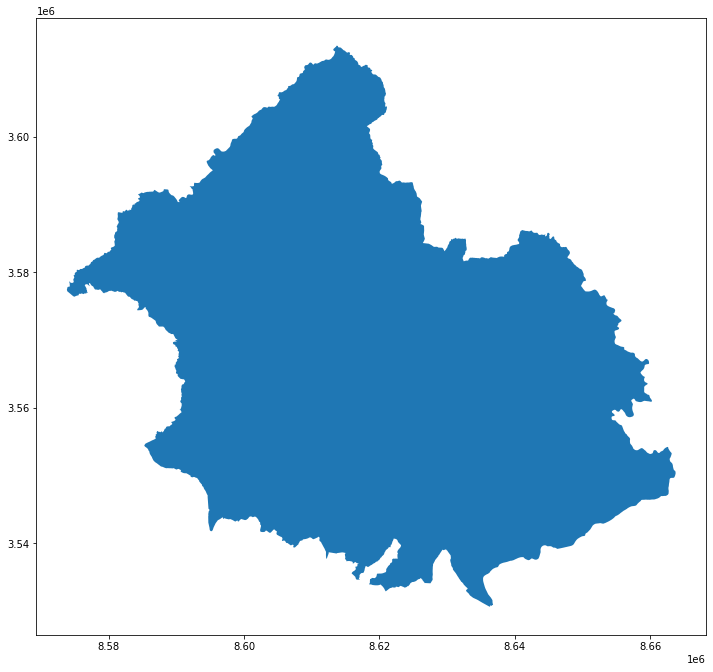

In [ ]:
map_df[map_df['District_name'] == 'SIRMAUR'].plot(figsize=(12, 12))

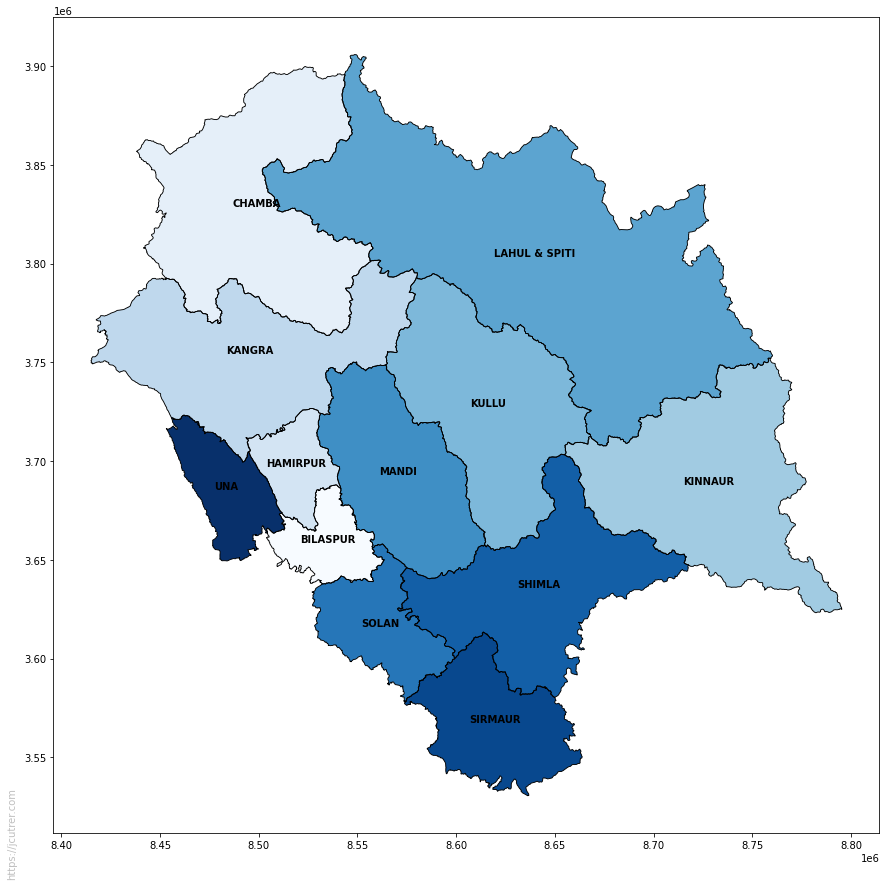

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(s=x.District_name, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10,fontweight="bold"),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=.9)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))
ax.text(-0.05, 0., 'https://jcutrer.com', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [ ]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/Himachal/Number-of-Medical-Institutions-during-2020-21.csv")
df.head()

,State,District,Hospitals,Dispensaries,Community Health Centre/RH,Primary Health Centres,Total (in Number),Beds available,Population,mi_per_lakh,beds_per_lakh
0,Himachal Pradesh,Bilaspur,5,1,6,38,50,655,382056,13.087087,171.440836
1,Himachal Pradesh,Chamba,8,0,4,46,58,1190,518844,11.178697,229.356030
2,Himachal Pradesh,Hamirpur,6,0,2,32,40,720,454293,8.804890,158.488024
3,Himachal Pradesh,Kangra,20,1,19,88,128,3093,1507223,8.492439,205.211837
4,Himachal Pradesh,Kinnaur,2,0,4,23,29,271,84298,34.401765,321.478564


In [ ]:
df['District'] = df['District'].str.upper()
df.fillna(0,inplace=True)
df.head()

,State,District,Hospitals,Dispensaries,Community Health Centre/RH,Primary Health Centres,Total (in Number),Beds available,Population,mi_per_lakh,beds_per_lakh
0,Himachal Pradesh,BILASPUR,5,1,6,38,50,655,382056,13.087087,171.440836
1,Himachal Pradesh,CHAMBA,8,0,4,46,58,1190,518844,11.178697,229.356030
2,Himachal Pradesh,HAMIRPUR,6,0,2,32,40,720,454293,8.804890,158.488024
3,Himachal Pradesh,KANGRA,20,1,19,88,128,3093,1507223,8.492439,205.211837
4,Himachal Pradesh,KINNAUR,2,0,4,23,29,271,84298,34.401765,321.478564


In [ ]:
District = df.District

In [ ]:
df.rename(columns = {'District':'District_name'}, inplace = True)
df.rename(columns = {'Beds available':'Beds_available'}, inplace = True)
df.rename(columns = {'Total (in Number)':'Total_mi'}, inplace = True)
df.shape

(13, 11)

In [ ]:
map_df = map_df.merge(df,on='District_name')
map_df

,name,geometry,District_name,State,Hospitals,Dispensaries,Community Health Centre/RH,Primary Health Centres,Total_mi,Beds_available,Population,mi_per_lakh,beds_per_lakh
0,Bilaspur,"POLYGON ((8538958.092 3687935.074, 8539034.893...",BILASPUR,Himachal Pradesh,5,1,6,38,50,655,382056,13.087087,171.440836
1,Chamba,"POLYGON ((8524772.966 3899404.265, 8525242.523...",CHAMBA,Himachal Pradesh,8,0,4,46,58,1190,518844,11.178697,229.356030
2,Hamirpur,"POLYGON ((8526452.774 3726687.628, 8526463.660...",HAMIRPUR,Himachal Pradesh,6,0,2,32,40,720,454293,8.804890,158.488024
3,Kangra,"POLYGON ((8561176.973 3801727.109, 8561267.291...",KANGRA,Himachal Pradesh,20,1,19,88,128,3093,1507223,8.492439,205.211837
4,Kinnaur,"POLYGON ((8758326.891 3752075.532, 8758368.587...",KINNAUR,Himachal Pradesh,2,0,4,23,29,271,84298,34.401765,321.478564
5,Kullu,"POLYGON ((8591309.049 3793590.154, 8591418.372...",KULLU,Himachal Pradesh,6,0,4,24,34,820,437474,7.771890,187.439711
6,Lahul & Spiti,"POLYGON ((8548916.893 3905808.832, 8548988.769...",LAHUL & SPITI,Himachal Pradesh,1,0,3,16,20,204,31528,63.435676,647.043897
7,Mandi,"POLYGON ((8549627.623 3749865.050, 8549656.086...",MANDI,Himachal Pradesh,17,0,11,85,113,2312,999518,11.305449,231.311492
8,Solan,"POLYGON ((8563036.634 3657818.821, 8563589.302...",SOLAN,Himachal Pradesh,7,7,6,39,59,907,576670,10.231155,157.282328
9,Shimla,"POLYGON ((8655743.728 3702630.025, 8655823.060...",SHIMLA,Himachal Pradesh,15,2,17,115,149,2951,813384,18.318531,362.805268


In [ ]:
convert_dict = {'mi_per_lakh': int,'beds_per_lakh': int
                }
map_df = map_df.astype(convert_dict)

In [ ]:
map_df.head()

,name,geometry,District_name,State,Hospitals,Dispensaries,Community Health Centre/RH,Primary Health Centres,Total_mi,Beds_available,Population,mi_per_lakh,beds_per_lakh
0,Bilaspur,"POLYGON ((8538958.092 3687935.074, 8539034.893...",BILASPUR,Himachal Pradesh,5,1,6,38,50,655,382056,13,171
1,Chamba,"POLYGON ((8524772.966 3899404.265, 8525242.523...",CHAMBA,Himachal Pradesh,8,0,4,46,58,1190,518844,11,229
2,Hamirpur,"POLYGON ((8526452.774 3726687.628, 8526463.660...",HAMIRPUR,Himachal Pradesh,6,0,2,32,40,720,454293,8,158
3,Kangra,"POLYGON ((8561176.973 3801727.109, 8561267.291...",KANGRA,Himachal Pradesh,20,1,19,88,128,3093,1507223,8,205
4,Kinnaur,"POLYGON ((8758326.891 3752075.532, 8758368.587...",KINNAUR,Himachal Pradesh,2,0,4,23,29,271,84298,34,321


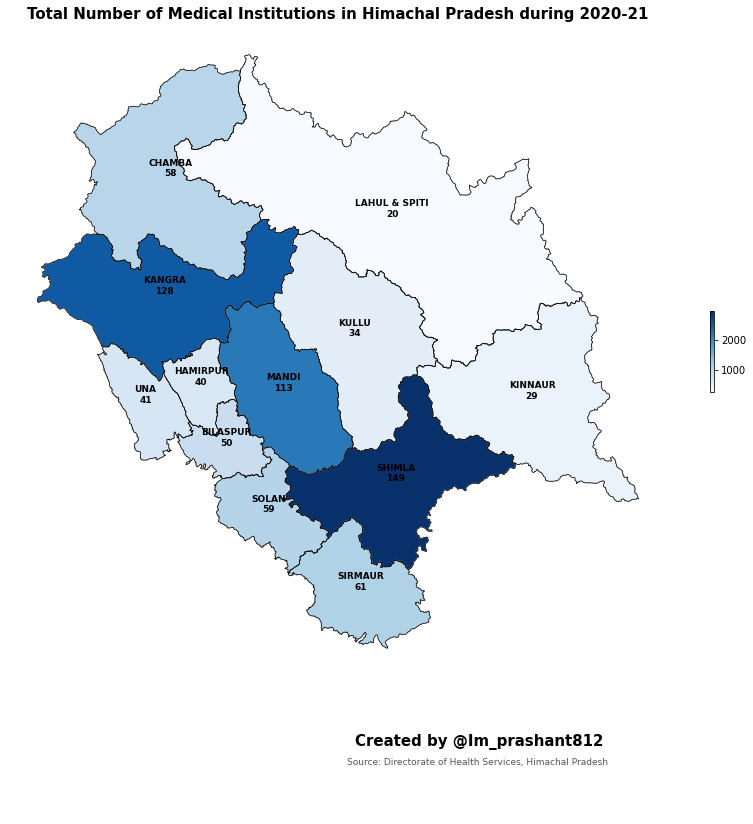

In [ ]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.District_name + "\n" + str(x.Total_mi), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=9,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.6)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))


ax.axis('off')
ax.set_title('Total Number of Medical Institutions in Himachal Pradesh during 2020-21', fontdict={'fontsize': '15', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source: Directorate of Health Services, Himachal Pradesh',xy=(0.46, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.Total_mi, cmap='Blues', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 271, 2951
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)

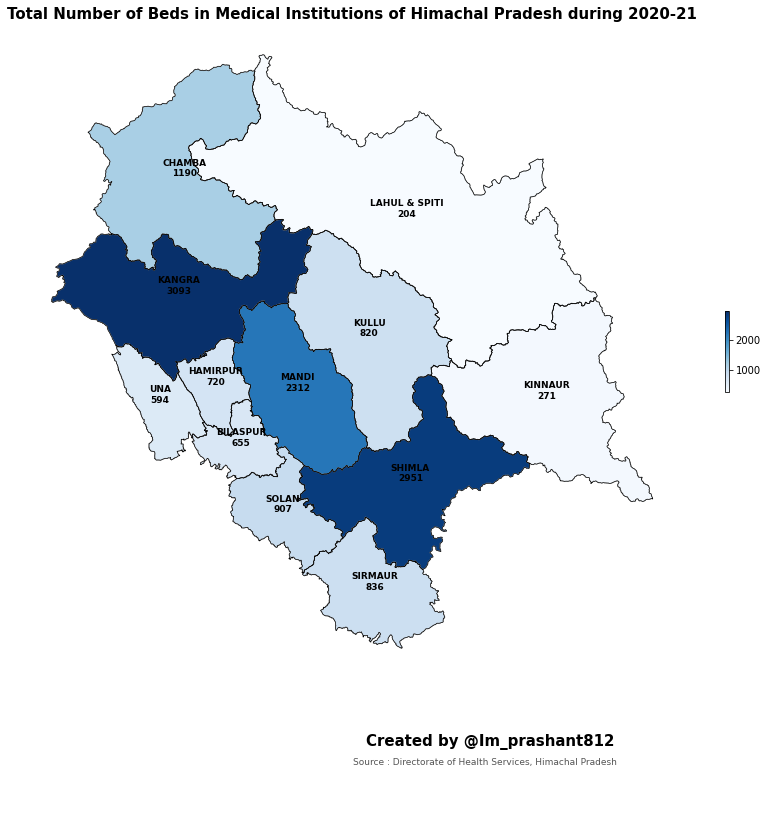

In [ ]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.District_name + "\n" + str(x.Beds_available), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=9,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.6)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))


ax.axis('off')
ax.set_title('Total Number of Beds in Medical Institutions of Himachal Pradesh during 2020-21', fontdict={'fontsize': '15', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source : Directorate of Health Services, Himachal Pradesh',xy=(0.46, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.Beds_available, cmap='Blues', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 271, 2951
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)

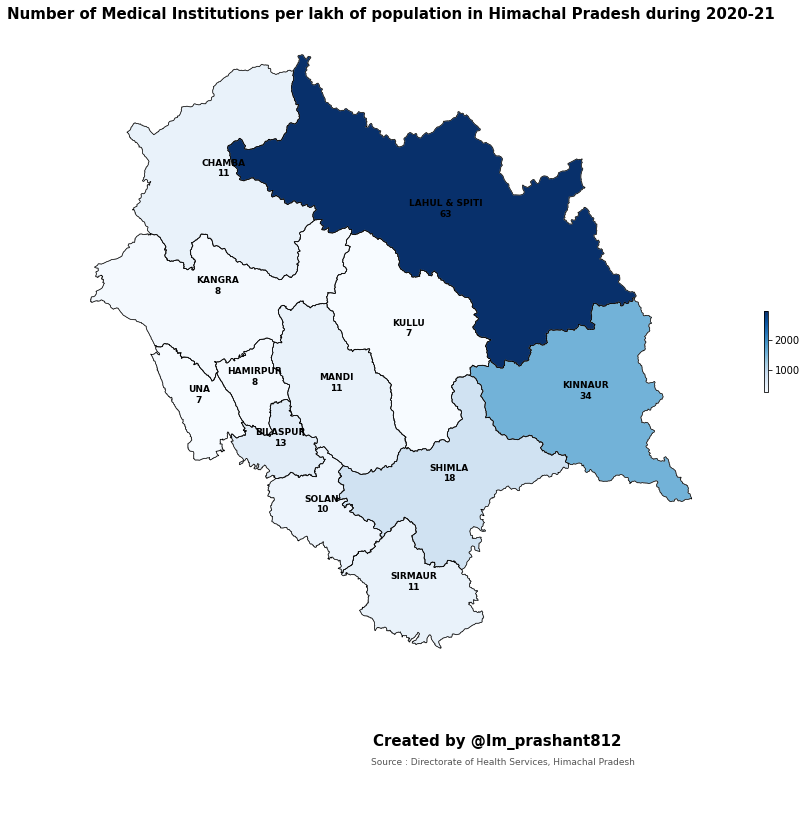

In [ ]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.District_name + "\n" + str(x.mi_per_lakh), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=9,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.6)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))


ax.axis('off')
ax.set_title('Number of Medical Institutions per lakh of population in Himachal Pradesh during 2020-21', fontdict={'fontsize': '15', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source : Directorate of Health Services, Himachal Pradesh',xy=(0.46, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.77, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.mi_per_lakh, cmap='Blues', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 271, 2951
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)

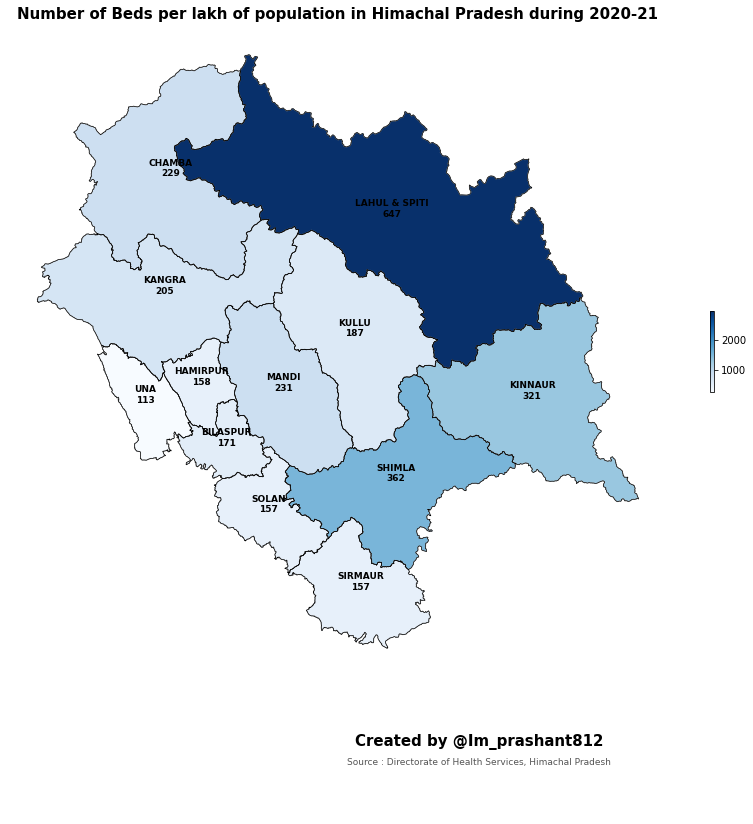

In [ ]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.District_name + "\n" + str(x.beds_per_lakh), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=9,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.6)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))


ax.axis('off')
ax.set_title('Number of Beds per lakh of population in Himachal Pradesh during 2020-21', fontdict={'fontsize': '15', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source : Directorate of Health Services, Himachal Pradesh',xy=(0.46, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.beds_per_lakh, cmap='Blues', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 271, 2951
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)